In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [2]:
def fetch_data(start, end):
    response = requests.get('https://tie.digitraffic.fi/api/v1/data/tms-data')
    return response.json()
def fetch_stations():
    response = requests.get('https://tie.digitraffic.fi/api/v3/metadata/tms-stations')
    stations = json_normalize(response.json()["features"])
    return stations

def fetch_sensors():
    response = requests.get('https://tie.digitraffic.fi/api/v3/metadata/tms-sensors')
    sensors = json_normalize(response.json()["roadStationSensors"])
    return sensors

In [3]:
stations = fetch_stations()

In [10]:
helsinki = stations[stations['properties.municipality']=='Helsinki']

In [5]:
a = fetch_data(1,2)

In [1]:
#a['tmsStations']


In [11]:
import plotly.express as px

In [12]:
coords = pd.DataFrame(helsinki['geometry.coordinates'].to_list(), columns=['lon','lat', 'z'])
fig = px.scatter_mapbox(coords, lat="lat", lon="lon")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [57]:
data = pd.read_csv('117_vt1_Munkkiniemi_20210301_20210331.xls', sep= ';', encoding='utf-16')

In [58]:
data.rename(columns={' Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka': 'TMS', 'Unnamed: 1': 'Location', "Unnamed: 2": 'Date', "Unnamed: 3":'Direction', "Unnamed: 4":'Type'}, inplace=True)

In [61]:
data.Date = pd.to_datetime(data.Date)

In [76]:
data.columns = data.columns.str.replace(' KLO_', '')
data.columns = data.columns.str.replace('-', '_')


In [113]:
data.columns

Index(['TMS', 'Location', 'Date', 'Direction', 'Type', '00_01', '01_02',
       '02_03', '03_04', '04_05', '05_06', '06_07', '07_08', '08_09', '09_10',
       '10_11', '11_12', '12_13', '13_14', '14_15', '15_16', '16_17', '17_18',
       '18_19', '19_20', '20_21', '21_22', '22_23', '23_00'],
      dtype='object')

In [100]:
for column in data.columns[5:]:
    data[column] = data[column].replace(' ', 0)
    data[column] = pd.to_numeric(data[column])

In [106]:
groups = data.groupby(['Date','Type'])

In [115]:
stats = groups.describe()

In [116]:
stats

TMS                                          \
                          count   mean  std    min    25%    50%    75%   
Date       Type                                                           
2021-01-03 11 HA-PA         2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           12 KAIP          2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           13 Linja-autot   2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           14 KAPP          2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           15 KATP          2.0  117.0  0.0  117.0  117.0  117.0  117.0   
...                         ...    ...  ...    ...    ...    ...    ...   
2021-12-03 13 Linja-autot   2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           14 KAPP          2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           15 KATP          2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           16 HA + PK       2.0  117.0  0.0  117.0  117.0  117.0  117.0   
           17 HA + AV       2.0  117.0  0.0  117.0  117.0  117.0  117.0   

                                 Direction       ...   22_23        23_00  \
                             max     count mean  ...     75%    max count   
Date       Type                                  ...                        
2021-01-03 11 HA-PA        117.0       2.0  1.5  ...  139.00  143.0   2.0   
           12 KAIP         117.0       2.0  1.5  ...    1.00    1.0   2.0   
           13 Linja-autot  117.0       2.0  1.5  ...    5.00    5.0   2.0   
           14 KAPP         117.0       2.0  1.5  ...    0.75    1.0   2.0   
           15 KATP         117.0       2.0  1.5  ...    0.00    0.0   2.0   
...                          ...       ...  ...  ...     ...    ...   ...   
2021-12-03 13 Linja-autot  117.0       2.0  1.5  ...    7.00    8.0   2.0   
           14 KAPP         117.0       2.0  1.5  ...    0.00    0.0   2.0   
           15 KATP         117.0       2.0  1.5  ...    0.00    0.0   2.0   
           16 HA + PK      117.0       2.0  1.5  ...    0.75    1.0   2.0   
           17 HA + AV      117.0       2.0  1.5  ...    0.00    0.0   2.0   

                                                                            
                           mean        std   min    25%   50%    75%   max  
Date       Type                                                             
2021-01-03 11 HA-PA        63.5  30.405592  42.0  52.75  63.5  74.25  85.0  
           12 KAIP          0.0   0.000000   0.0   0.00   0.0   0.00   0.0  
           13 Linja-autot   3.0   1.414214   2.0   2.50   3.0   3.50   4.0  
           14 KAPP          0.0   0.000000   0.0   0.00   0.0   0.00   0.0  
           15 KATP          0.5   0.707107   0.0   0.25   0.5   0.75   1.0  
...                         ...        ...   ...    ...   ...    ...   ...  
2021-12-03 13 Linja-autot   4.0   0.000000   4.0   4.00   4.0   4.00   4.0  
           14 KAPP          0.0   0.000000   0.0   0.00   0.0   0.00   0.0  
           15 KATP          1.0   1.414214   0.0   0.50   1.0   1.50   2.0  
           16 HA + PK       0.0   0.000000   0.0   0.00   0.0   0.00   0.0  
           17 HA + AV       0.0   0.000000   0.0   0.00   0.0   0.00   0.0  

[217 rows x 208 columns]

In [142]:
snapshot = data[(data.Date=='2021-01-03') & (data.Direction==1)]

In [143]:
snapshot.iloc[: , 5:]

,00_01,01_02,02_03,03_04,04_05,05_06,06_07,07_08,08_09,09_10,...,14_15,15_16,16_17,17_18,18_19,19_20,20_21,21_22,22_23,23_00
0,51,14,17,19,22,63,305,594,722,582,...,996,1498,1340,937,752,563,396,244,143,85
1,1,0,2,1,0,4,8,8,14,21,...,12,13,3,7,2,0,3,1,1,0
2,1,0,0,0,3,12,12,19,13,12,...,19,20,19,14,12,6,6,3,5,4
3,1,4,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,3,3,0,...,0,1,1,2,0,1,1,1,0,1
5,0,0,0,0,0,0,0,0,2,3,...,3,7,1,0,1,4,2,0,0,0
6,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,0,0,0,0,0,0


In [151]:
snapshot

,TMS,Location,Date,Direction,Type,00_01,01_02,02_03,03_04,04_05,...,14_15,15_16,16_17,17_18,18_19,19_20,20_21,21_22,22_23,23_00
0,117,vt1_Munkkiniemi,2021-01-03,1,11 HA-PA,51,14,17,19,22,...,996,1498,1340,937,752,563,396,244,143,85
1,117,vt1_Munkkiniemi,2021-01-03,1,12 KAIP,1,0,2,1,0,...,12,13,3,7,2,0,3,1,1,0
2,117,vt1_Munkkiniemi,2021-01-03,1,13 Linja-autot,1,0,0,0,3,...,19,20,19,14,12,6,6,3,5,4
3,117,vt1_Munkkiniemi,2021-01-03,1,14 KAPP,1,4,0,0,0,...,1,1,0,0,0,0,0,1,1,0
4,117,vt1_Munkkiniemi,2021-01-03,1,15 KATP,0,0,0,0,0,...,0,1,1,2,0,1,1,1,0,1
5,117,vt1_Munkkiniemi,2021-01-03,1,16 HA + PK,0,0,0,0,0,...,3,7,1,0,1,4,2,0,0,0
6,117,vt1_Munkkiniemi,2021-01-03,1,17 HA + AV,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


   00_01  01_02  02_03  03_04  04_05  05_06  06_07  07_08  08_09  09_10  ...  \
0     51     14     17     19     22     63    305    594    722    582  ...   

   14_15  15_16  16_17  17_18  18_19  19_20  20_21  21_22  22_23  23_00  
0    996   1498   1340    937    752    563    396    244    143     85  

[1 rows x 24 columns]
   00_01  01_02  02_03  03_04  04_05  05_06  06_07  07_08  08_09  09_10  ...  \
1      1      0      2      1      0      4      8      8     14     21  ...   

   14_15  15_16  16_17  17_18  18_19  19_20  20_21  21_22  22_23  23_00  
1     12     13      3      7      2      0      3      1      1      0  

[1 rows x 24 columns]
   00_01  01_02  02_03  03_04  04_05  05_06  06_07  07_08  08_09  09_10  ...  \
2      1      0      0      0      3     12     12     19     13     12  ...   

   14_15  15_16  16_17  17_18  18_19  19_20  20_21  21_22  22_23  23_00  
2     19     20     19     14     12      6      6      3      5      4  

[1 rows x 24 columns]
   0

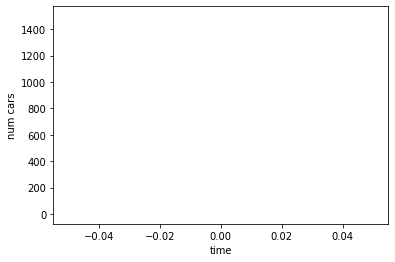

In [159]:
fig, ax = plt.subplots()
ax.set_xlabel('time')
ax.set_ylabel('num cars')

for car_type in snapshot.Type.unique():
    d = snapshot[snapshot.Type==car_type]
    values = d.iloc[: , 5:]
    print(values)
    ax.plot(values.values)